# EDA on Subset of Data
William Wu

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import *

In [2]:
df = pd.read_csv('Milestone3.csv', sep='\t')

In [3]:
# Data is for registered voters
df.head()

,Unnamed: 0,Unnamed: 0.1,index,district,id,LAST_NAME,FIRST_NAME,zip,female,dob,regyear,party,electiondate,general,typeofvote,age,GEN16,GEN14
0,0,0,4581539,DUV,103746250,Jennings,Barbara,32225,F,1944-05-23 00:00:00,08/12/2004,REP,11/08/2016,GEN,A,73.0,1,0
1,1,1,6399633,DUV,103699536,Nellenbach,Marlene,32223,F,1944-07-04 00:00:00,09/03/1996,NPA,11/04/2014,GEN,A,73.0,0,0
2,2,2,5068762,DUV,103823224,YORK,MARTHA,32246,F,1948-02-10 00:00:00,10/05/1992,REP,11/04/2008,GEN,Y,69.0,0,1
3,3,3,2390889,CLA,102858200,SUCO,BRANDI,32656,F,1981-09-25 00:00:00,05/16/2000,IDP,11/07/2006,GEN,N,36.0,0,0
4,4,4,7092052,DUV,103844317,Amato,Lisa,32250,F,1972-09-14 00:00:00,10/01/2004,DEM,11/04/2008,GEN,Y,45.0,0,1


Note: results may not be representative given the relatively small sample size.
For example, there are few voters under 30, therefore the proportions look odd on the graph.
Should be fine for this milestone, but will be corrected on a larger dataset.

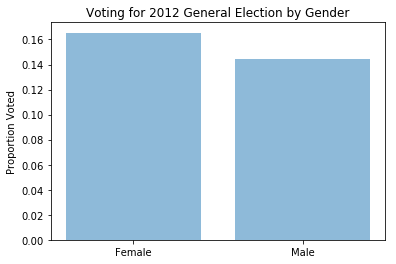

In [4]:
# Bar chart for gender on 2012 elections
objects = ('Female', 'Male')
x = np.arange(len(objects))

mean = df.groupby('female').GEN14.mean()
performance = (mean['F'], mean['M'])

plt.bar(x, performance, align='center', alpha=0.5)
plt.xticks(x, objects)
plt.ylabel('Proportion Voted')
plt.title('Voting for 2012 General Election by Gender')
 
plt.show()

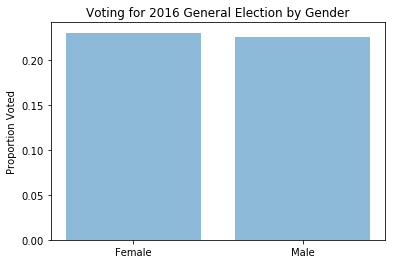

In [5]:
# Bar chart for gender on 2016 elections
objects = ('Female', 'Male')
x = np.arange(len(objects))

mean = df.groupby('female').GEN16.mean()
performance = (mean['F'], mean['M'])

plt.bar(x, performance, align='center', alpha=0.5)
plt.xticks(x, objects)
plt.ylabel('Proportion Voted')
plt.title('Voting for 2016 General Election by Gender')
 
plt.show()

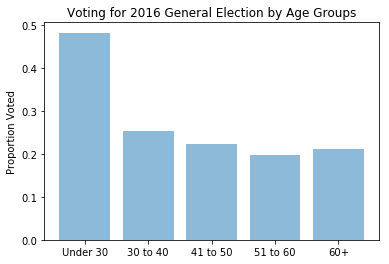

In [6]:
# Voting by age in 2016
age_groups = ('Under 30', '30 to 40', '41 to 50', '51 to 60', '60+')

out = pd.cut(df.age, bins=[0, 29, 40, 50, 60, 1000])
results = df.groupby(out).GEN16.mean()

plt.bar(np.arange(len(age_groups)), results, align='center', alpha=0.5)
plt.xticks(np.arange(len(age_groups)), age_groups)
plt.ylabel('Proportion Voted')
plt.title('Voting for 2016 General Election by Age Groups')
 
plt.show()

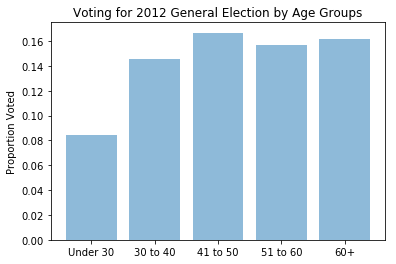

In [7]:
# Voting by age in 2012
age_groups = ('Under 30', '30 to 40', '41 to 50', '51 to 60', '60+')

out = pd.cut(df.age, bins=[0, 29, 40, 50, 60, 1000])
results = df.groupby(out).GEN14.mean()

plt.bar(np.arange(len(age_groups)), results, align='center', alpha=0.5)
plt.xticks(np.arange(len(age_groups)), age_groups)
plt.ylabel('Proportion Voted')
plt.title('Voting for 2012 General Election by Age Groups')
 
plt.show()

In [8]:
# Counts of votes for each type
df['typeofvote'].value_counts()

Y    1976
E    1737
A    1036
N     386
B       8
P       3
Name: typeofvote, dtype: int64

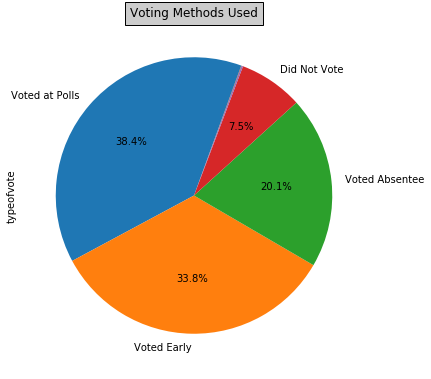

In [9]:
# Understand the breakdown of voting methods for registered voters in elections
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

labels = 'Voted at Polls', 'Voted Early', 'Voted Absentee', 'Did Not Vote', '', ''

# Do not display the percentages of small values - these are votes that do not count
def my_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 2 else ''

df['typeofvote'].value_counts().plot.pie(labels=labels, autopct=my_autopct, startangle=70)
plt.title('Voting Methods Used', bbox={'facecolor':'0.8', 'pad':5})
plt.show()

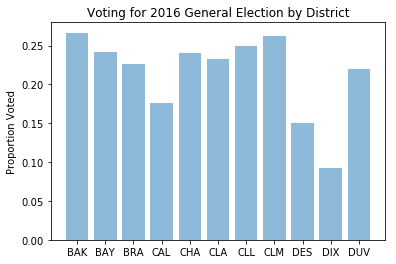

In [10]:
# Voter turnout by district in 2016
a = df.groupby('district').GEN16.mean()

plt.bar(np.arange(len(a.index)), a, align='center', alpha=0.5)
plt.xticks(np.arange(len(a.index)), a.index)
plt.ylabel('Proportion Voted')
plt.title('Voting for 2016 General Election by District')

plt.show()

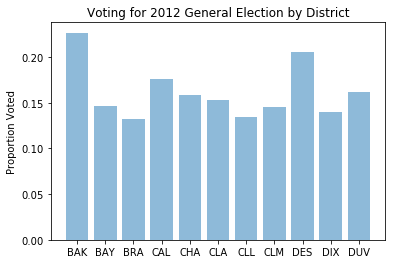

In [11]:
# Voter turnout by district in 2012
a = df.groupby('district').GEN14.mean()

plt.bar(np.arange(len(a.index)), a, align='center', alpha=0.5)
plt.xticks(np.arange(len(a.index)), a.index)
plt.ylabel('Proportion Voted')
plt.title('Voting for 2012 General Election by District')

plt.show()